# Анализ онлайн-рынка персональных компьютеров

## Шаг 0. Импорт необходимых библиотек

In [9]:
import pandas as pd
import numpy as np
import re
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import seaborn as sns

## Шаг 1. Загрузка и предварительная обработка данных

Исходные данные:
- идентификатор товара (product_id)
- наименование товара (title)
- цена товара в руб. (price)
- количество продаж (sales)
- количество отзывов (feedbacks)
- наименование продавца (seller)
- рейтинг продавца (seller_rating)
- данные о процессоре (Процессор), в т. ч. о типе процессора (Процессор_тип),
о количестве ядер процессора (Количество ядер процессора)
- данные об оперативной памяти (Оперативная память), в т. ч. о типе
оперативной памяти (Тип оперативной памяти), об объеме оперативной
памяти (Объем оперативной памяти (Гб))
- данные об жестком диске (Жесткий диск), в т. ч. об объеме накопителя HDD
(Объем накопителя HDD), об объеме накопителя SSD (Объем накопителя
SSD)
- данные о видеопроцессоре (Видеопроцессор)
- данные об операционной системе (Операционная система)
- данные о гарантийном сроке (Гарантийный срок)
- страна производства (Страна производства)
- данные о габарите товара (Габариты товара), в т. ч. о ширине предмета
(Ширина предмета), о глубине предмета (Глубина предмета), о высоте
предмета (Высота предмета), о весе предмета (Вес без упаковки (кг))
- данные о габарите товара с упаковкой (Габариты товара (с упаковкой)), в т.
ч. длине упаковки (Длина упаковки), о ширине упаковки (Ширина упаковки),
о высоте упаковки (Высота упаковки), о весе предмета с упаковкой (Вес с
упаковкой (кг))

In [2]:
df = pd.read_excel('wb_pc_easy.xlsx', sheet_name='Sheet1', engine='openpyxl')

In [3]:
df.head(n=10)

,Идентификатор товара,Наименование,"Цена, руб.",Продавец,Видеопроцессор,Операционная система,Процессор_тип,Количество ядер процессора,Тип оперативной памяти,Объем оперативной памяти (Гб),Объем накопителя HDD,Объем накопителя SSD
0,17877962,Системный блок,32900,не указан,не указано,не установлена,Intel,NaN,не заполнено,16.0,не заполнено,256 Gb
1,17880420,Компьютер Hp Prodesk 400 g6 mt,35720,не указан,не указано,не установлена,не заполнено,NaN,не заполнено,16.0,не заполнено,512 Gb
2,36404916,Игровой компьютер Robotcomp M16 2.0 Magic Red ...,79385,Robotcomp,NVIDIA,WINDOWS,Intel,6.0,DDR 4,16.0,не заполнено,60 Gb
3,36416268,Игровой компьютер Robotcomp M16 2.0 Magic Red ...,89113,Robotcomp,NVIDIA,WINDOWS,Intel,6.0,DDR 4,16.0,не заполнено,60 Gb
4,45087757,Игровой компьютер Robotcomp F22 Raptor V1 Plus,50969,Robotcomp,NVIDIA,WINDOWS,Intel,4.0,DDR 4,32.0,не заполнено,480 Gb
5,45915905,Игровой компьютер Robotcomp F22 Raptor Plus V3,61890,Robotcomp,NVIDIA,WINDOWS,Intel,4.0,DDR 4,32.0,не заполнено,480 Gb
6,46455023,Игровой Компьютер Robotcomp Аллигатор 2.0 V2 Plus,37151,Robotcomp,AMD,WINDOWS,AMD,6.0,DDR 4,32.0,не заполнено,512 Gb
7,46460220,Игровой Компьютер Robotcomp ТУ 160 V2 Plus,103665,Robotcomp,NVIDIA,WINDOWS,Intel,10.0,DDR 4,32.0,не заполнено,60 Gb
8,46461423,Игровой Компьютер Robotcomp ТУ 160 V3 Plus,110184,Robotcomp,NVIDIA,WINDOWS,Intel,10.0,DDR 4,32.0,не заполнено,60 Gb
9,46647908,"Компьютер Raskat Standart 510 (Ryzen 5 3600, R...",34794,не указан,NVIDIA,WINDOWS,AMD,6.0,DDR 4,8.0,не заполнено,256 Gb


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2663 entries, 0 to 2662
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Идентификатор товара           2663 non-null   int64  
 1   Наименование                   2663 non-null   object 
 2   Цена, руб.                     2663 non-null   int64  
 3   Продавец                       2663 non-null   object 
 4   Видеопроцессор                 2663 non-null   object 
 5   Операционная система           2663 non-null   object 
 6   Процессор_тип                  2663 non-null   object 
 7   Количество ядер процессора     2587 non-null   float64
 8   Тип оперативной памяти         2663 non-null   object 
 9   Объем оперативной памяти (Гб)  2591 non-null   float64
 10  Объем накопителя HDD           2663 non-null   object 
 11  Объем накопителя SSD           2663 non-null   object 
dtypes: float64(2), int64(2), object(8)
memory usage:

In [5]:
df.dtypes

Идентификатор товара               int64
Наименование                      object
Цена, руб.                         int64
Продавец                          object
Видеопроцессор                    object
Операционная система              object
Процессор_тип                     object
Количество ядер процессора       float64
Тип оперативной памяти            object
Объем оперативной памяти (Гб)    float64
Объем накопителя HDD              object
Объем накопителя SSD              object
dtype: object

In [7]:
df.describe()

,Идентификатор товара,"Цена, руб.",Количество ядер процессора,Объем оперативной памяти (Гб)
count,2.663000e+03,2663.000000,2587.000000,2591.000000
mean,1.358646e+08,71009.043184,6.862775,19.262061
std,2.584597e+07,31051.440446,3.757245,22.176521
min,1.787796e+07,15222.000000,2.000000,4.000000
25%,1.411781e+08,47872.000000,4.000000,16.000000
50%,1.452274e+08,71007.000000,6.000000,16.000000
75%,1.509542e+08,85699.000000,8.000000,16.000000
max,1.529808e+08,235900.000000,24.000000,1000.000000


In [8]:
df.isna().sum().to_frame("Количество пропусков")

,Количество пропусков
Идентификатор товара,0
Наименование,0
"Цена, руб.",0
Продавец,0
Видеопроцессор,0
Операционная система,0
Процессор_тип,0
Количество ядер процессора,76
Тип оперативной памяти,0
Объем оперативной памяти (Гб),72


In [10]:
# Функция парсинга объёма (как в предыдущем шаге)
def parse_size(val):
    if isinstance(val, (int, float)) and not math.isnan(val):
        return float(val)
    if isinstance(val, str):
        val = val.strip().lower().replace(',', '.')
        match = re.search(r'([\d\.]+)', val)
        if match:
            num = float(match.group(1))
            if 'tb' in val:
                return num * 1000
            return num
    return np.nan

In [11]:
# Добавляем числовые столбцы SSD/HDD
df["SSD_GB"] = df["Объем накопителя SSD"].apply(parse_size)
df["HDD_GB"] = df["Объем накопителя HDD"].apply(parse_size)

In [18]:
# Словарь переименования
rename_dict = {
    "Идентификатор товара": "Product_ID",
    "Наименование": "Name",
    "Цена, руб.": "Price_RUB",
    "Продавец": "Seller",
    "Видеопроцессор": "GPU",
    "Операционная система": "OS",
    "Процессор_тип": "CPU_Type",
    "Количество ядер процессора": "CPU_Cores",
    "Тип оперативной памяти": "RAM_Type",
    "Объем оперативной памяти (Гб)": "RAM_GB",
    "Объем накопителя HDD": "HDD_Capacity",
    "Объем накопителя SSD": "SSD_Capacity"
}

df.rename(columns=rename_dict, inplace=True)
df["CPU_Cores"] = df["CPU_Cores"].astype("Int64")

In [19]:
df.head(n=100)

,Product_ID,Name,Price_RUB,Seller,GPU,OS,CPU_Type,CPU_Cores,RAM_Type,RAM_GB,HDD_Capacity,SSD_Capacity,SSD_GB,HDD_GB
0,17877962,Системный блок,32900,не указан,не указано,не установлена,Intel,<NA>,не заполнено,16.0,не заполнено,256 Gb,256.0,NaN
1,17880420,Компьютер Hp Prodesk 400 g6 mt,35720,не указан,не указано,не установлена,не заполнено,<NA>,не заполнено,16.0,не заполнено,512 Gb,512.0,NaN
2,36404916,Игровой компьютер Robotcomp M16 2.0 Magic Red ...,79385,Robotcomp,NVIDIA,WINDOWS,Intel,6,DDR 4,16.0,не заполнено,60 Gb,60.0,NaN
3,36416268,Игровой компьютер Robotcomp M16 2.0 Magic Red ...,89113,Robotcomp,NVIDIA,WINDOWS,Intel,6,DDR 4,16.0,не заполнено,60 Gb,60.0,NaN
4,45087757,Игровой компьютер Robotcomp F22 Raptor V1 Plus,50969,Robotcomp,NVIDIA,WINDOWS,Intel,4,DDR 4,32.0,не заполнено,480 Gb,480.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,61680477,"Бесшумный компьютер. No Windows, I3-6100T 2 Co...",59520,Бесшумный Компьютер,Intel,не установлена,не заполнено,2,DDR 4,16.0,не заполнено,240 Gb,240.0,NaN
96,61682024,"Бесшумный компьютер. No Windows, I3-6100T 2 Co...",62510,Бесшумный Компьютер,Intel,не установлена,не заполнено,2,DDR 4,16.0,не заполнено,480 Gb,480.0,NaN
97,61682029,"Бесшумный компьютер. Windows 10 Home, I3-6100T...",73490,Бесшумный Компьютер,Intel,WINDOWS,не заполнено,2,DDR 4,8.0,не заполнено,480 Gb,480.0,NaN
98,61682030,"Бесшумный компьютер. Windows 10 Home, I3-6100T...",72760,Бесшумный Компьютер,Intel,WINDOWS,не заполнено,2,DDR 4,8.0,не заполнено,480 Gb,480.0,NaN


## Шаг 2 Визуализация данных

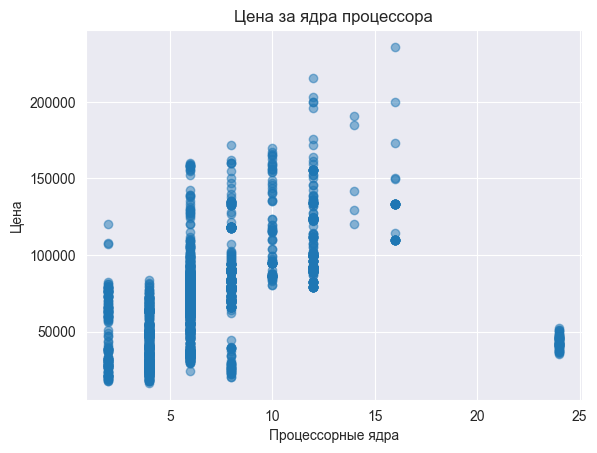

In [23]:
df_scatter = df[["CPU_Cores", "Price_RUB"]].dropna()
plt.figure()
plt.scatter(df_scatter["CPU_Cores"], df_scatter["Price_RUB"], alpha=0.5)
plt.title("Цена за ядра процессора")
plt.xlabel("Процессорные ядра")
plt.ylabel("Цена")
plt.show()

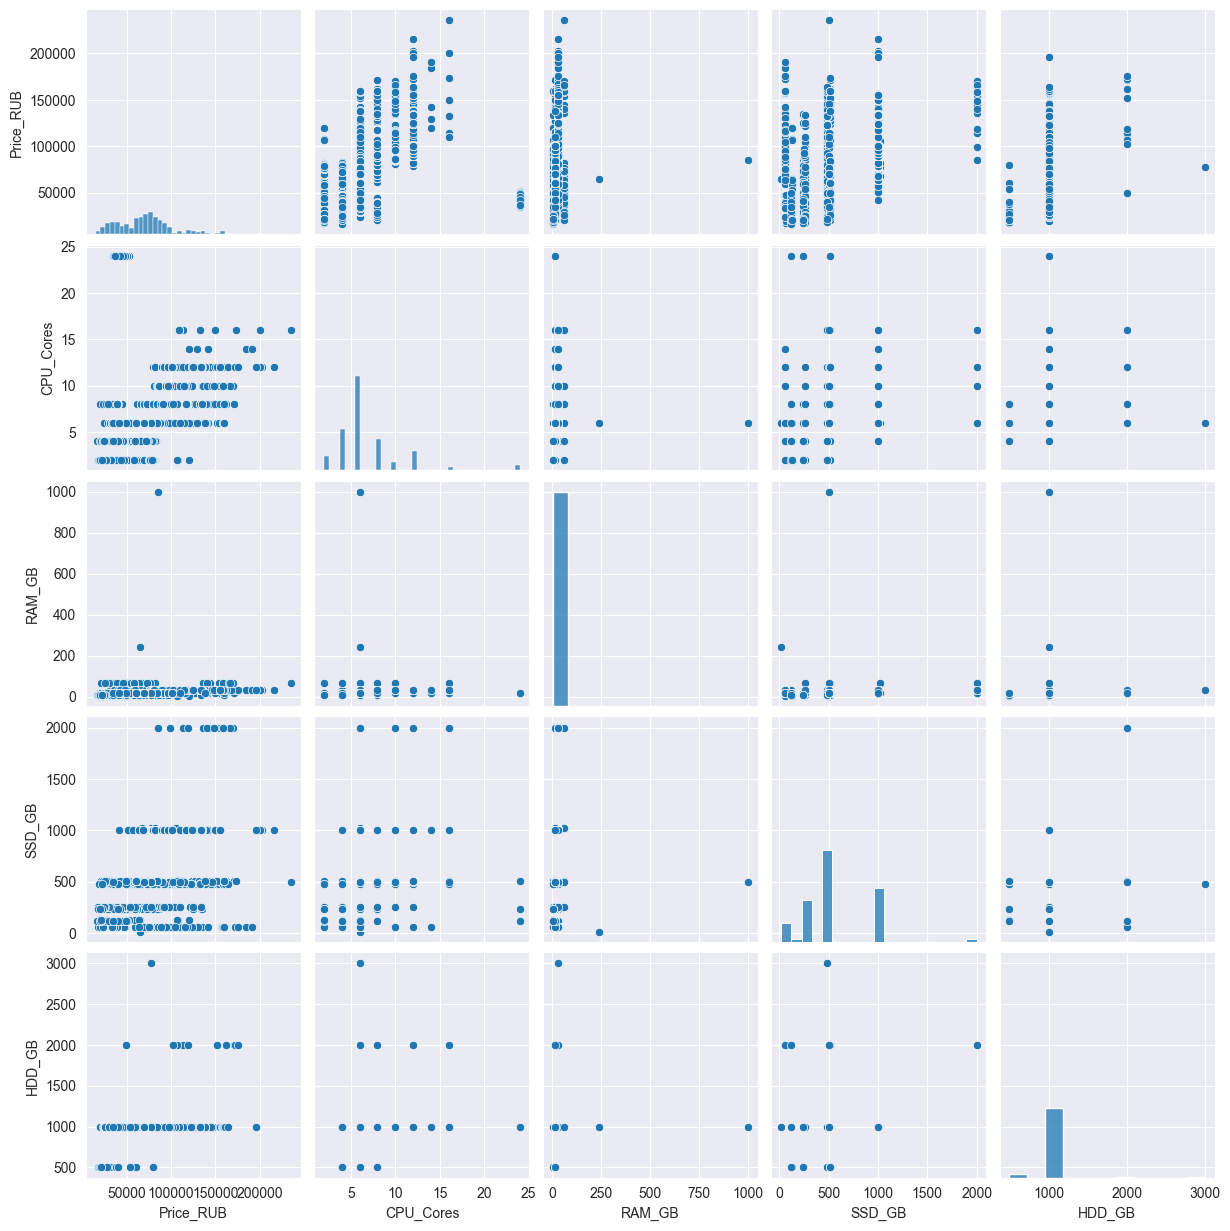

In [24]:
col = ['Price_RUB', 'CPU_Cores', 'RAM_GB', 'SSD_GB', 'HDD_GB', 'OS']
sns.pairplot(df.loc[:,col])

In [26]:
# Boxplot: Price by GPU Vendor
def gpu_vendor(x):
    if isinstance(x, str):
        x = x.lower()
        if "nvidia" in x:
            return "NVIDIA"
        if "amd" in x:
            return "AMD"
        if "intel" in x:
            return "Intel"
    return "Other"
df["GPU_Vendor"] = df["GPU"].apply(gpu_vendor)

<Figure size 640x480 with 0 Axes>

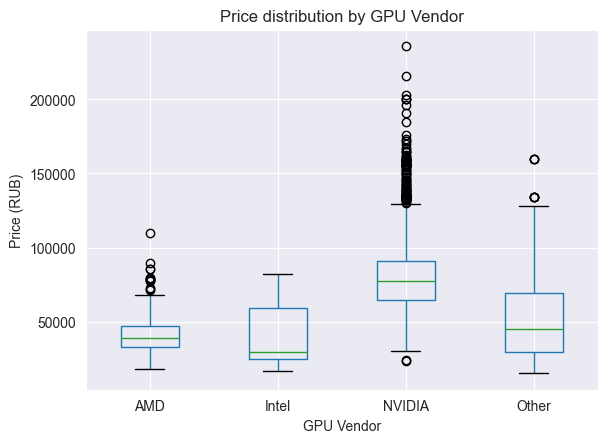

In [27]:
plt.figure()
df.boxplot(column="Price_RUB", by="GPU_Vendor")
plt.title("Price distribution by GPU Vendor")
plt.suptitle("")
plt.xlabel("GPU Vendor")
plt.ylabel("Price (RUB)")
plt.show()